## 2 Spectra Analysis

A notebook to explore and analyse the spectra.

## Setup

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

## Analysis

In [2]:
# read in modelling dataset
df = pd.read_pickle("../2_sample_selection/data/prepared/mango_dmc_and_spectra_v2.pkl").query("outlier_flag_1 == 0")
df_o = df.query("outlier_flag_1 == 0")
x_cols = df.filter(regex="^\d+", axis=1).columns
descriptive_cols = [col for col in df.columns if col not in x_cols]
df

,partition_1,outlier_flag_1,subsequent_flag_1,train_partition_1,sample_order_1,partition_ext,origin,population,date,season,...,1173,1176,1179,1182,1185,1188,1191,1194,1197,1200
0,train,0,0,calibration,28262,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,train,0,0,calibration,80895,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,train,0,0,calibration,31015,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,train,0,0,calibration,563,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,train,0,0,calibration,3737,,published,100100,2015-09-27,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85396,holdout,0,0,calibration,6265,,marcelo,200800,NaT,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85397,holdout,0,0,calibration,54886,,marcelo,200800,NaT,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85398,holdout,0,0,calibration,76820,,marcelo,200800,NaT,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85399,holdout,0,0,calibration,860,,marcelo,200800,NaT,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# population with most instruments
pop_instrument = df.groupby(["population", "instrument"]).size().reset_index()
pop_instrument.groupby(["population"]).size().reset_index().sort_values(by=0, ascending=False)

,population,0
91,107500,12
92,107600,12
90,107400,12
89,107300,12
57,104500,11
...,...,...
17,101900,1
16,101800,1
15,101600,1
14,101500,1


In [4]:
# instruments with most pops
pop_instrument = df.groupby(["population", "instrument"]).size().reset_index()
pop_instrument.groupby(["instrument"]).size().reset_index().sort_values(by=0, ascending=False)

,instrument,0
1,15006,118
3,15014,79
5,15016,58
6,15023,51
16,16041,43
12,15038,39
0,14002,37
11,15029,34
30,30004,32
4,15015,31


In [5]:
df.query("population in [107300, 107400, 107500, 107600]").groupby(["instrument"]).size()
df.query("instrument == 17040").groupby(["population"]).size()

population
104500    84
104600    54
104700    68
107300    88
107400    80
107500    84
107600    80
107800    80
107900    74
108000    80
108100    80
dtype: int64

## Plot Mean Spectra

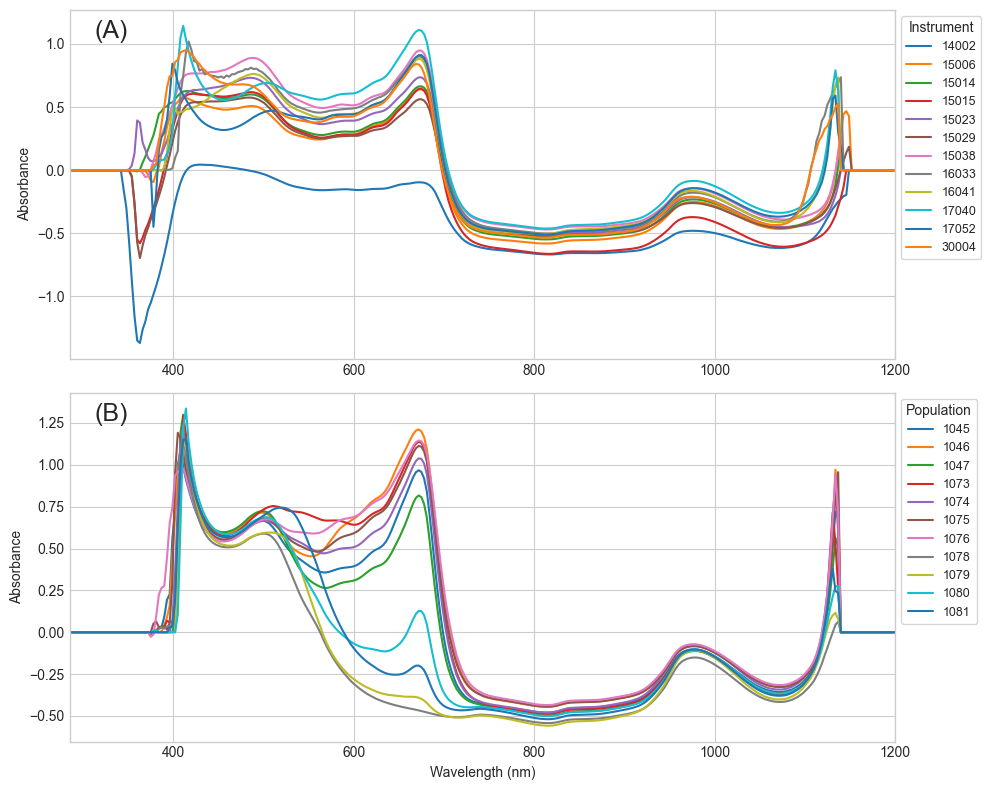

In [7]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))  # Adjusted figsize for vertical layout

# First subplot for partition_1 == 'train'
filtered_df_train = df_o.query("population in [107300, 107400, 107500, 107600]")
mean_spectra_train = filtered_df_train.groupby("instrument")[x_cols].mean()
wavelengths = [int(x.split("_")[0]) for x in x_cols]

# Plotting mean spectra for each instrument in the first subplot
for instrument, spectra in mean_spectra_train.iterrows():
    axes[0].plot(wavelengths, spectra.values, label=f"{instrument}")

axes[0].set_ylabel("Absorbance")
axes[0].set_xlim([285, 1200])

# Move the legend off the right of the first subplot
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9, title="Instrument", frameon=True)

# Second subplot for partition_1 != 'train'
filtered_df_not_train = df_o.query("instrument == 17040")
mean_spectra_not_train = filtered_df_not_train.groupby("population")[x_cols].mean()

# Plotting mean spectra for each population in the second subplot
for population, spectra in mean_spectra_not_train.iterrows():
    axes[1].plot(wavelengths, spectra.values, label=f"{int(population/100)}")

axes[1].set_ylabel("Absorbance")
axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_xlim([285, 1200])

# Move the legend off the right of the second subplot
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9, title="Population", frameon=True)

# Adding letters to the subplots
axes[0].text(0.03, 0.97, '(A)', transform=axes[0].transAxes, fontsize=18, verticalalignment='top')
axes[1].text(0.03, 0.97, '(B)', transform=axes[1].transAxes, fontsize=18, verticalalignment='top')

plt.tight_layout()
# Adjust subplot parameters to give some space for the legend, especially the right margin
plt.subplots_adjust(right=0.75)

plt.show()


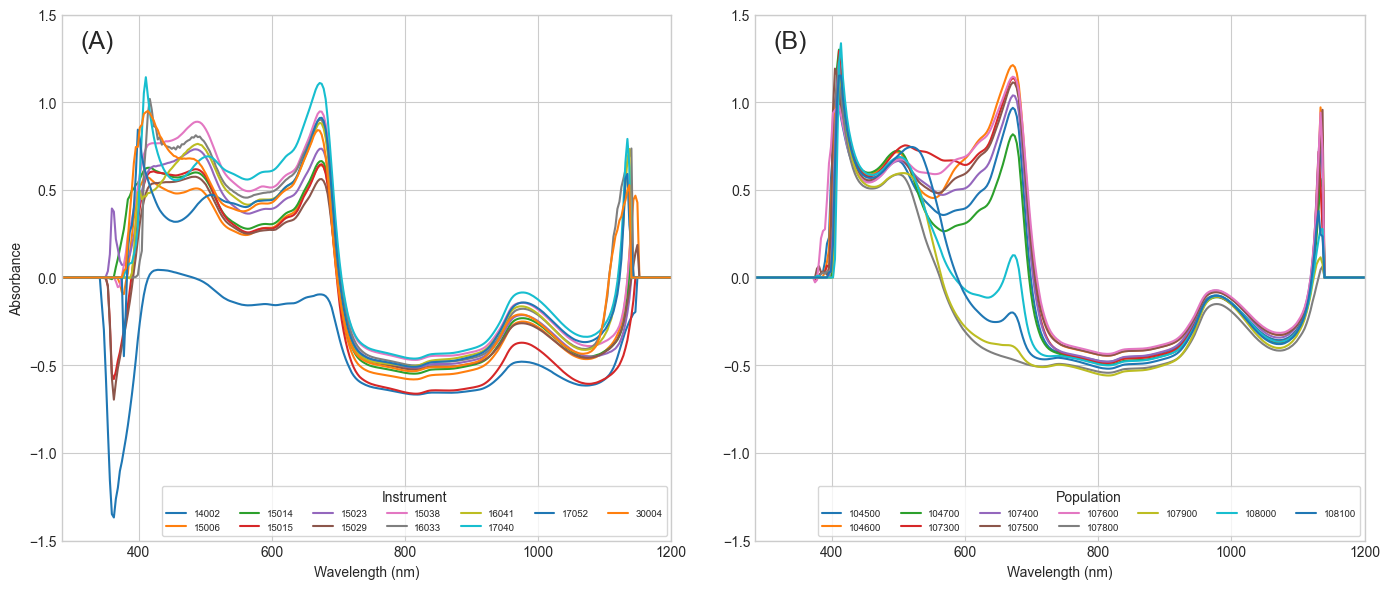

In [33]:
# create a figure with two subplots side by side
plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# first subplot for partition_1 == 'train'
filtered_df_train = df_o.query("population in [107300, 107400, 107500, 107600]")
mean_spectra_train = filtered_df_train.groupby("instrument")[x_cols].mean()
wavelengths = [int(x.split("_")[0]) for x in x_cols]

# plotting mean spectra for each instrument in the first subplot
for instrument, spectra in mean_spectra_train.iterrows():
    axes[0].plot(wavelengths, spectra.values, label=f"{instrument}")

axes[0].set_ylabel("Absorbance")
axes[0].set_xlabel("Wavelength (nm)")
axes[0].set_xlim([285, 1200])
axes[0].set_ylim([-1.5, 1.5])
axes[0].legend(loc='lower right', ncol=7, fontsize=7, title="Instrument", frameon=True)


# Second subplot for partition_1 != 'train'
filtered_df_not_train = df_o.query("instrument == 17040")
mean_spectra_not_train = filtered_df_not_train.groupby("population")[x_cols].mean()

# Plotting mean spectra for each instrument in the second subplot
for instrument, spectra in mean_spectra_not_train.iterrows():
    axes[1].plot(wavelengths, spectra.values, label=f"{instrument}")

axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_xlim([285, 1200])
axes[1].set_ylim([-1.5, 1.5])
axes[1].legend(loc='lower right', ncol=7, fontsize=7, title="Population", frameon=True)


axes[0].text(0.03, 0.97, '(A)', transform=axes[0].transAxes, fontsize=18, verticalalignment='top')
axes[1].text(0.03, 0.97, '(B)', transform=axes[1].transAxes, fontsize=18, verticalalignment='top')

plt.tight_layout()
plt.show()


### Mean absorbance per instrument from spectra samples from the training set (A) and the validation and holdout set (B)

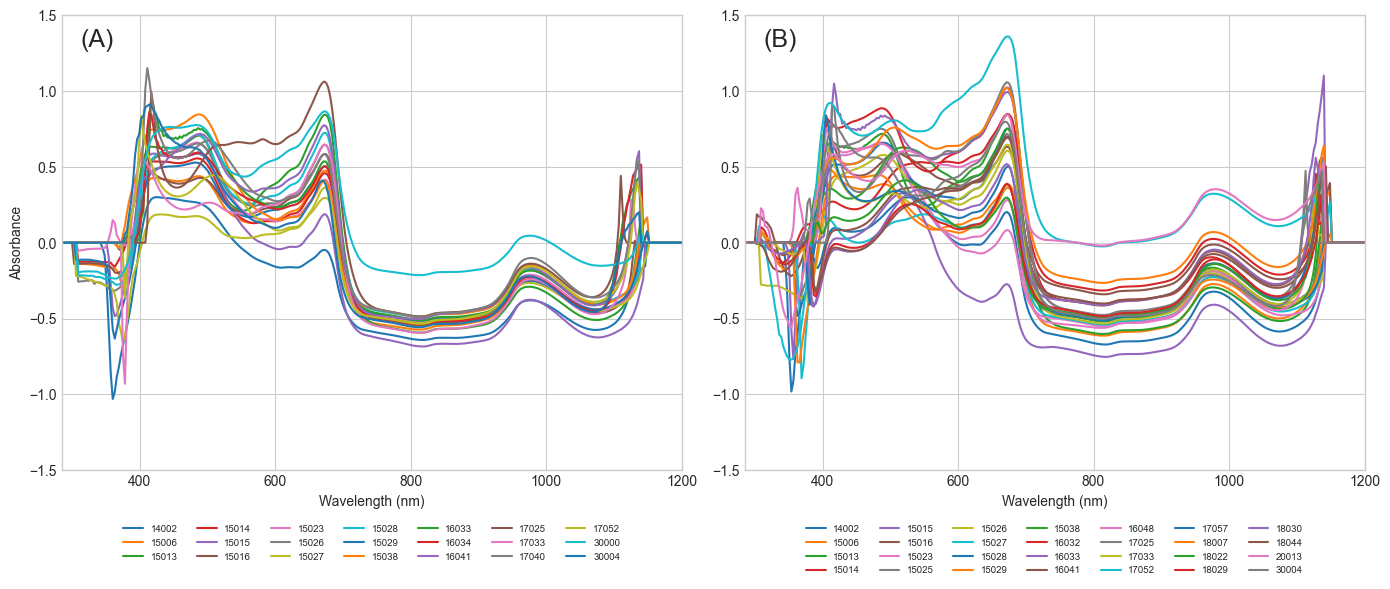

In [24]:
# create a figure with two subplots side by side
plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# first subplot for partition_1 == 'train'
filtered_df_train = df_o.query("partition_1 == 'train'")
mean_spectra_train = filtered_df_train.groupby("instrument")[x_cols].mean()
wavelengths = [int(x.split("_")[0]) for x in x_cols]

# plotting mean spectra for each instrument in the first subplot
for instrument, spectra in mean_spectra_train.iterrows():
    axes[0].plot(wavelengths, spectra.values, label=f"{instrument}")

axes[0].set_ylabel("Absorbance")
axes[0].set_xlabel("Wavelength (nm)")
axes[0].set_xlim([285, 1200])
axes[0].set_ylim([-1.5, 1.5])
axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=7, fontsize=7)


# Second subplot for partition_1 != 'train'
filtered_df_not_train = df_o.query("partition_1 != 'train'")
mean_spectra_not_train = filtered_df_not_train.groupby("instrument")[x_cols].mean()

# Plotting mean spectra for each instrument in the second subplot
for instrument, spectra in mean_spectra_not_train.iterrows():
    axes[1].plot(wavelengths, spectra.values, label=f"{instrument}")

axes[1].set_xlabel("Wavelength (nm)")
axes[1].set_xlim([285, 1200])
axes[1].set_ylim([-1.5, 1.5])
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=7, fontsize=7)


axes[0].text(0.03, 0.97, '(A)', transform=axes[0].transAxes, fontsize=18, verticalalignment='top')
axes[1].text(0.03, 0.97, '(B)', transform=axes[1].transAxes, fontsize=18, verticalalignment='top')

plt.tight_layout()
plt.show()
